<a href="https://colab.research.google.com/github/popgenDK/evalPopStructure/blob/main/evalPCA_step_by_step_example_with_Chen%26Story_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Load function for plotting


In [69]:
#function plotCorRres for plotting correlations
source("https://raw.githubusercontent.com/GenisGE/evalAdmix/master/visFuns.R")

#load genetic test data
load(url("http://pontus.popgen.dk/albrecht/open/admixTjeck/data.Rdata"))


## summaries data



In [70]:
cat("\ngenotype matrix\n")
dim(geno)

#transpose genotype
g <- t(geno)

cat("\nNumber of Individuals\n")
(N <- nrow(geno))

cat("\nNumber of SNPs\n")
( M <- ncol(geno))

cat("\n number of individual in each population\n")
pop <- as.factor(pop)
table(pop)


genotype matrix


[1]   374 54048


Number of Individuals


[1] 374


Number of SNPs


[1] 54048


 number of individual in each population


pop
CEU CHB MXL YRI 
 99 103  64 108 

# PCA1 method. Chen and Storey 
There is no centering and the diagonal of the coverance has the mean heterozygoisty subtracted




In [71]:
# average heterozygosity per indivdual
d_hat <- colMeans(g * (2 - g)) 

# diagonal matrix of d_hat
D_hat <- diag(d_hat) 

#covariance matrix with
H_hat <- 1 / M * (t(g) %*% g) - D_hat

#perform decomposition of covariance matrix
e <- eigen(H_hat)


## plot the results

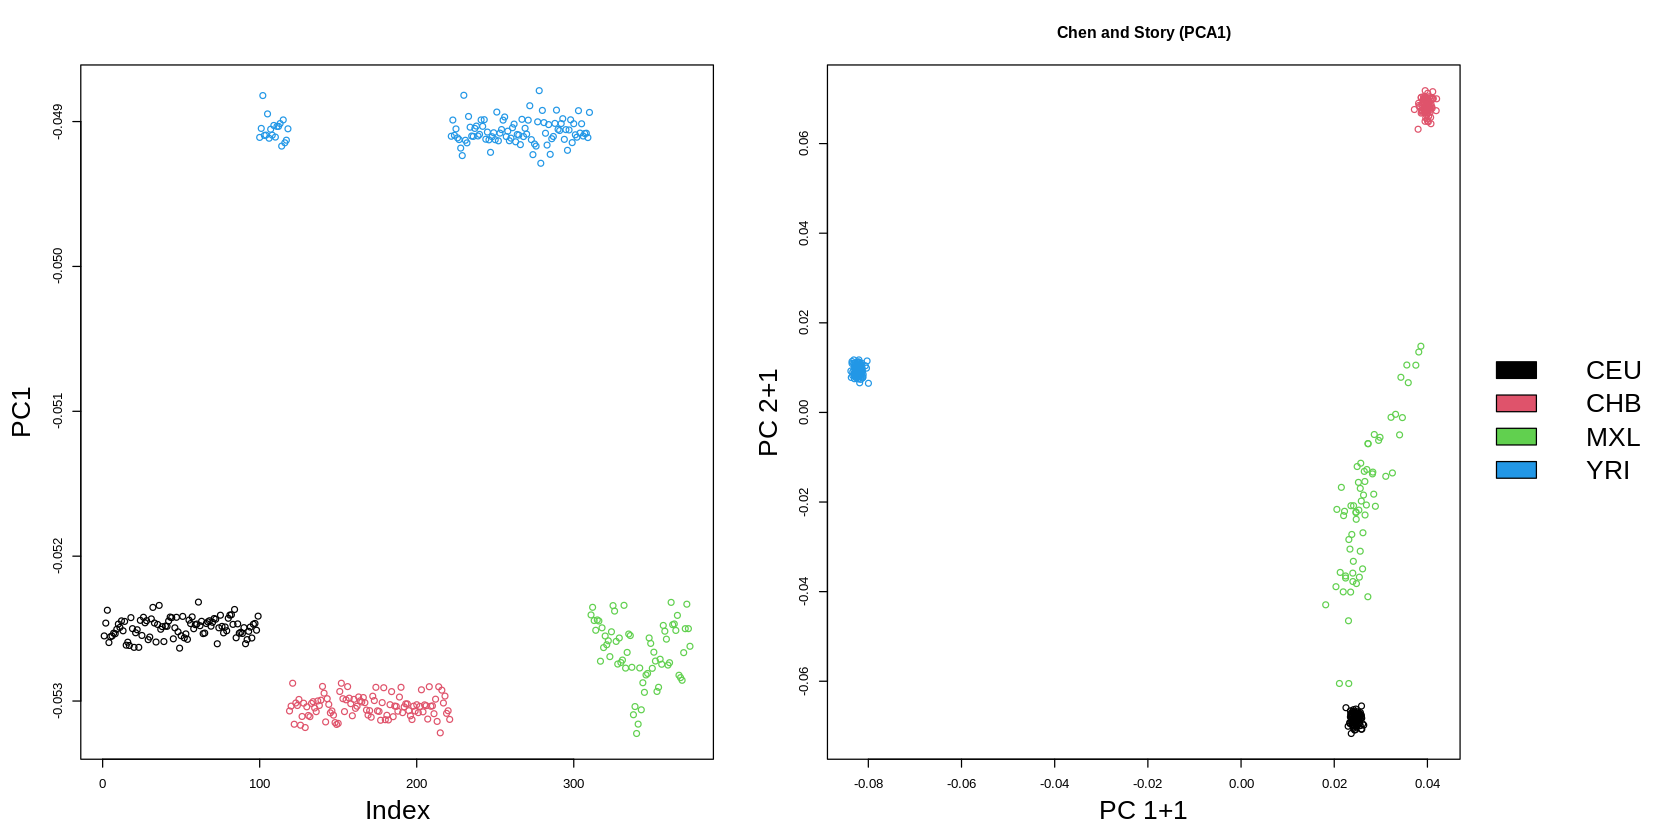

In [72]:
layout(matrix(1:3,1),w=c(4,4,1))
options(repr.plot.width=14, repr.plot.height=7)


# for the chen and story PCA the first PC is different then standard PCA used in genentics
par(mar=c(5.1,5.1,4.1,2.1))
plot(e$vectors[,1],ylab="PC1",col=pop,cex.lab=2)
plot(e$vectors[,2:3],col=pop,xlab="PC 1+1",ylab="PC 2+1",cex.lab=2,main="Chen and Story (PCA1)")

#plot legend
par(mar=c(0,0,0,0))
plot.new()
legend("center",fill=1:4,levels(pop),cex=2,bty="n")


In the visulazation the mexican population appears to be a mixture of European ( CEU ) and and chinese (CHB). However, this is due to their ancestry being both european and native american with the chinese individual being a proxy for their native american ancestry. 

We can try to evaluate the PCA using to correlation of residuals of the first 3 principal components


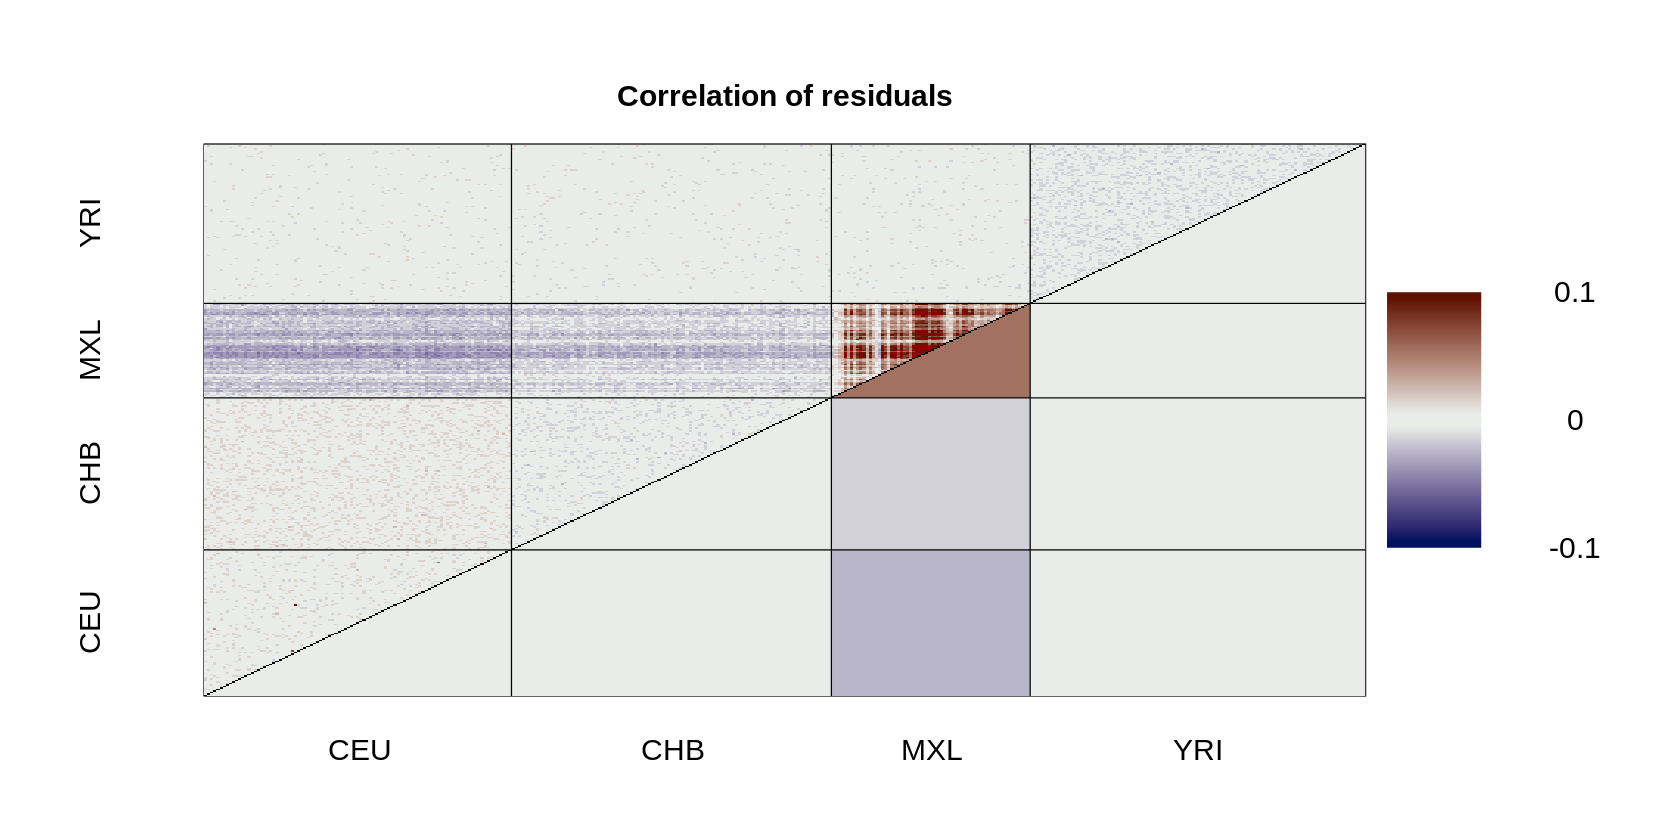

In [73]:
k <- 2+1
phatk <- e$vectors[,1:k] %*% t(e$vectors[,1:k])

# emperical correlation of residuals
rk <- g %*% (diag(N) - phatk)
bhat <- cor(rk)

## estimated correlattion matrix assuming the admixture model
chat <- (diag(N) - phatk) %*% D_hat %*% (diag(N) - phatk)

#emerical correlation adjusted for the estimated correlation from the admixture model
corres <- bhat - chat

#plot the difference in correlation 
plotCorRes(corres, pop,max=0.1)




The upper triagle is the corrected correlation between idnividauls while the lower triangle is the mean corrected correlation within and between populations. 

As can be seen many of the MXL have a high residual correlation within 
population and negative between populations. This suggests that the MXL are more similar between each other than suggested by the PCA plot above. This is because the PCA with k=3 models the MXL as a mixture between CEU and CHB. 


## which individuals have a bad fit

We can try to show which individual have a bad fit by identifying individuals that have a high correlation with one or more individuals. This is shown below

coll
  (-1,0.02] (0.02,0.05]  (0.05,0.1]     (0.1,1] 
        252          64          29          29 

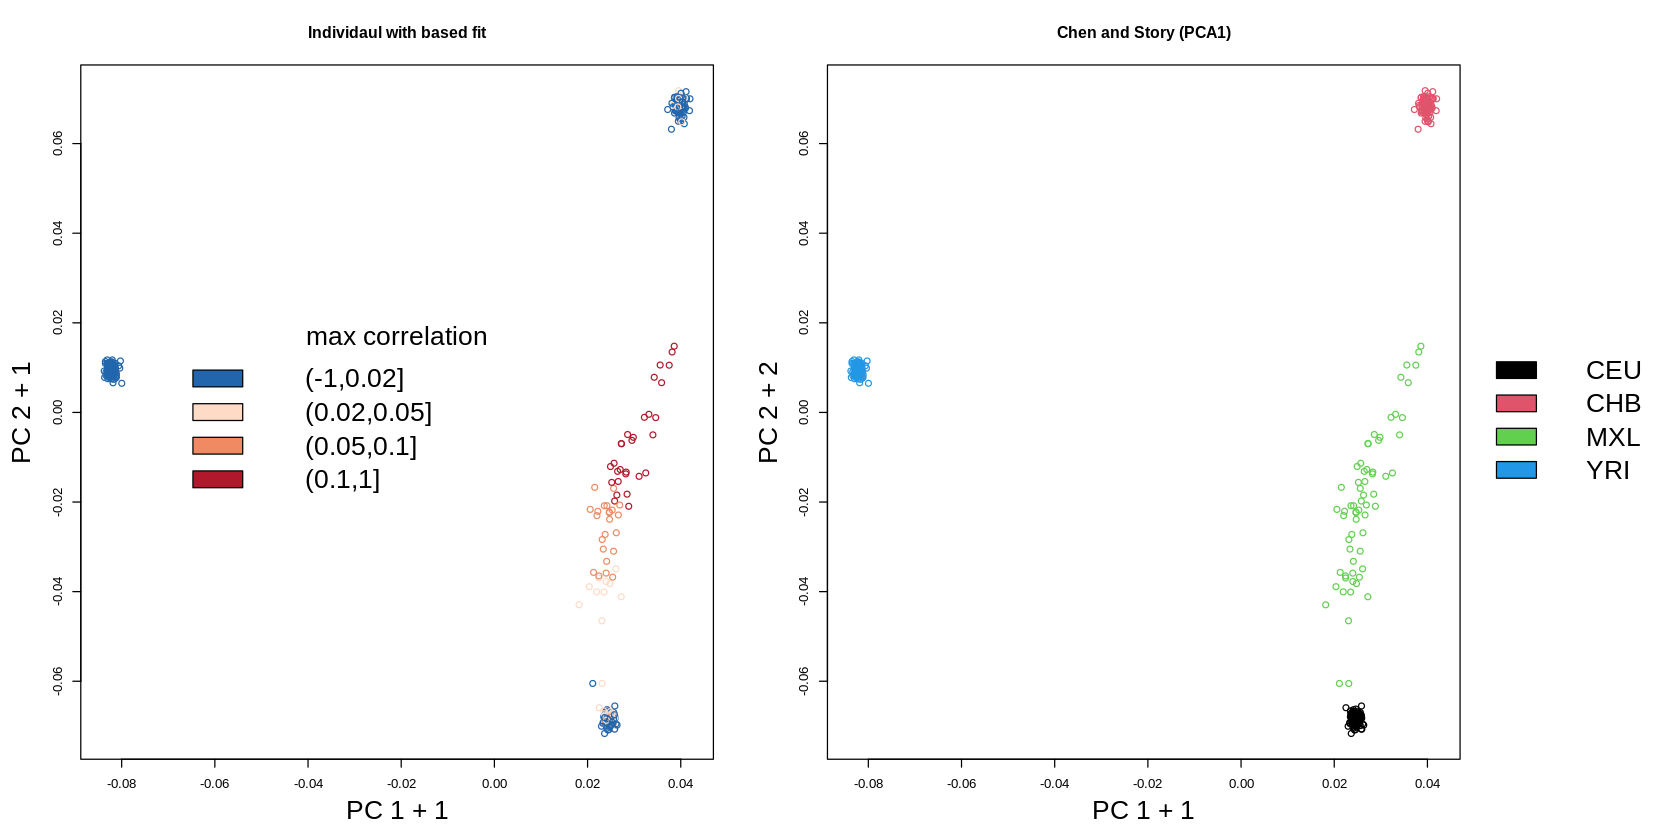

In [74]:

layout(matrix(1:3,1),w=c(4,4,1))
options(repr.plot.width=14, repr.plot.height=7)


#color individuals by their maximum correlation
eval <- corres
diag(eval) <- 0
maxCor <- apply(eval,1,max)
redBlue <- c("#2166ac","#fddbc7","#ef8a62","#b2182b")
coll <- cut( maxCor ,c(-1,0.02,0.05,0.1,1))


# show the maximum correlation in the plot
par(mar=c(5.1,5.1,4.1,2.1))
#plot(e$vectors[,2:3],col="black",xlab="PC2",ylab="PC3",cex.lab=2,main="Chen and Story (PCA1)")
plot(e$vectors[,1:2+1],main="Individaul with based fit",xlab="PC 1 + 1",ylab="PC 2 + 1",col=redBlue[coll],cex.lab=2)
legend("center",fill=redBlue,title="max correlation",levels(coll),cex=2,bty="n")

## PCA plto
plot(e$vectors[,2:3],col=pop,xlab="PC 1 + 1",ylab="PC 2 + 2",cex.lab=2,main="Chen and Story (PCA1)")

#plot legend
par(mar=c(0,0,0,0))
plot.new()
legend("center",fill=1:4,levels(pop),cex=2,bty="n")


## Adding another dimension

Instead of using 2 PCs to model the population structure we can try to use 3. In this way we can allow for the native american ancestry to have its own ancestral allele frequency instead of being model togeather with the chinese. 

The PCA will look like this

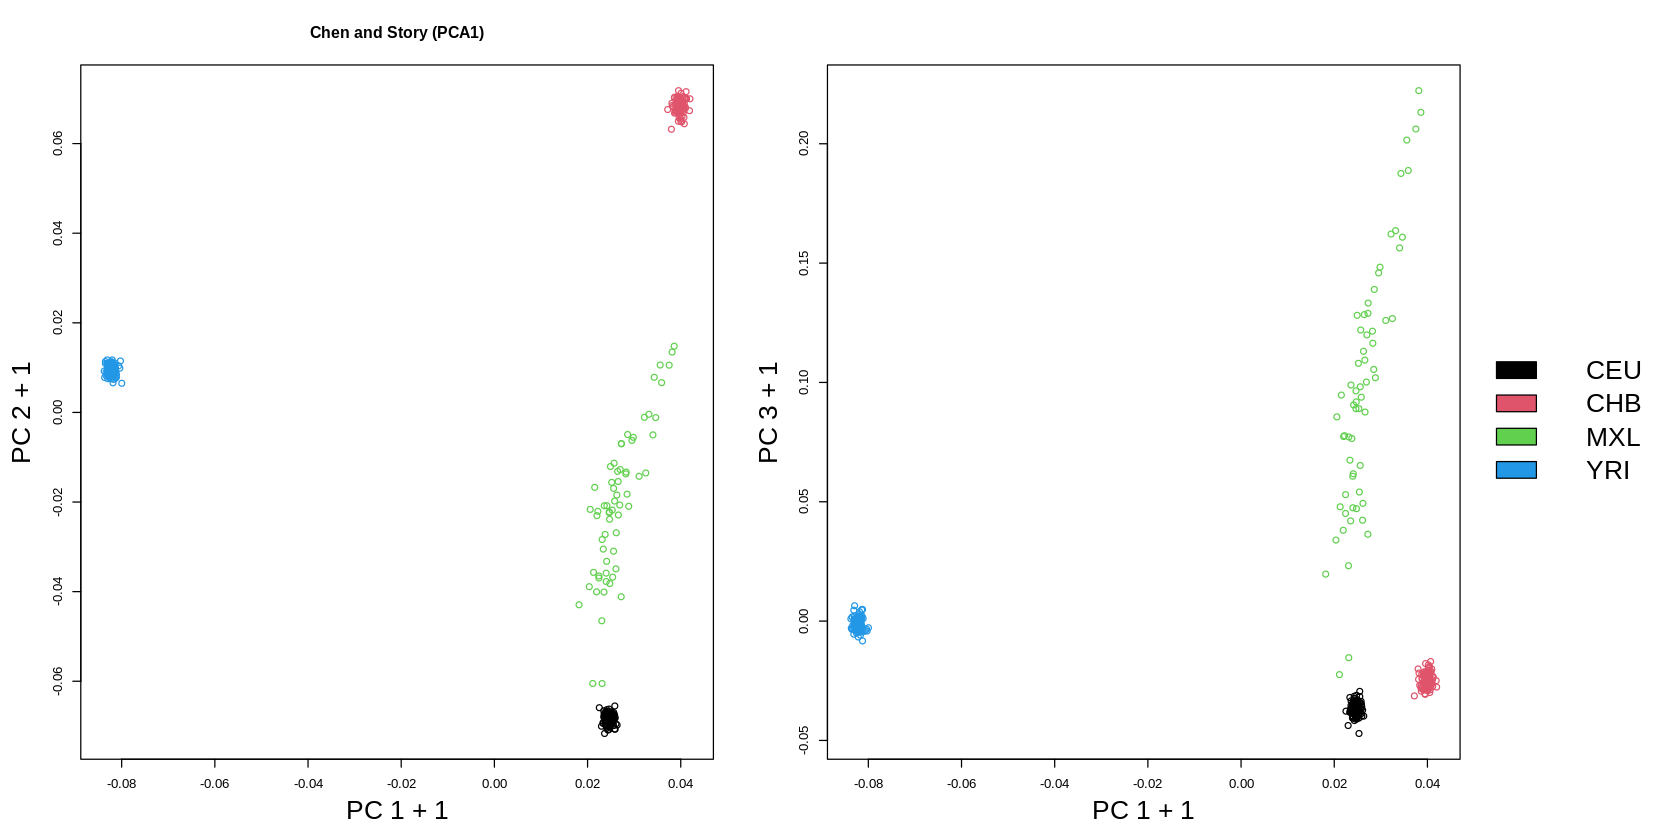

In [77]:
layout(matrix(1:3,1),w=c(4,4,1))
options(repr.plot.width=14, repr.plot.height=7)


# for the chen and story PCA the first PC is different then standard PCA used in genentics
par(mar=c(5.1,5.1,4.1,2.1))
plot(e$vectors[,2:3],col=pop,xlab="PC 1 + 1",ylab="PC 2 + 1",cex.lab=2,main="Chen and Story (PCA1)")
plot(e$vectors[,c(2,4)],ylab="PC 3 + 1" ,xlab="PC 1 + 1",col=pop,cex.lab=2)

#plot legend
par(mar=c(0,0,0,0))
plot.new()
legend("center",fill=1:4,levels(pop),cex=2,bty="n")


The new PC ( PC 3+1) now shows that the MXL have some ancestry that is not a mixture of the CEU and  CHB and the correlation of residuals is now low:

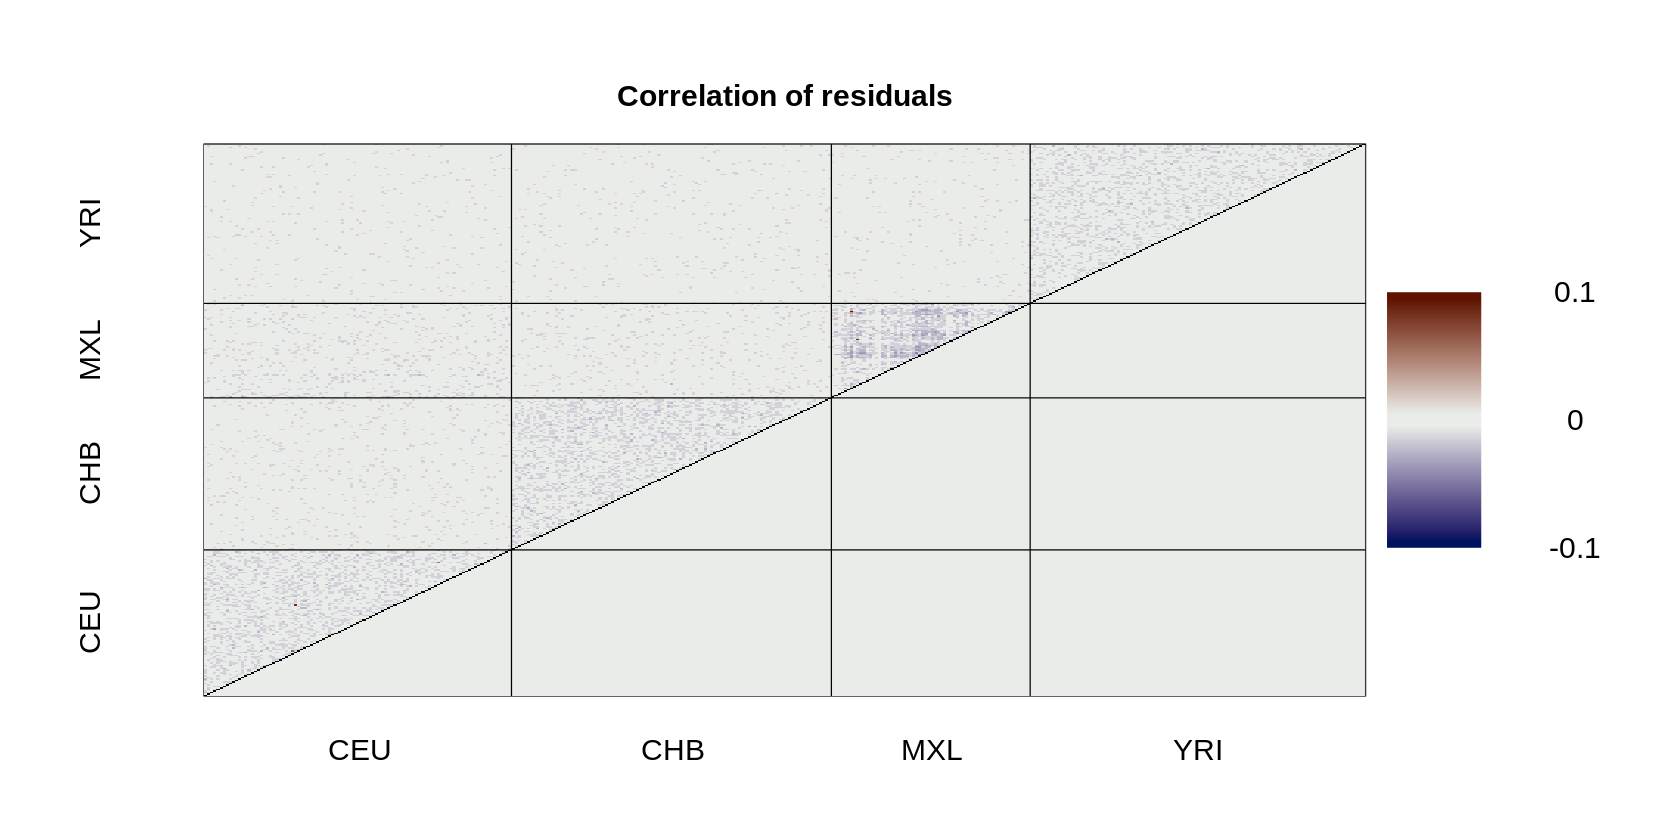

In [76]:
k<- 3+1
phatk <- e$vectors[,1:k] %*% t(e$vectors[,1:k])

# emperical correlation of residuals
rk <- g %*% (diag(N) - phatk)
bhat <- cor(rk)

## estimated correlattion matrix assuming the admixture model
chat <- (diag(N) - phatk) %*% D_hat %*% (diag(N) - phatk)

#difference between emerical and estimated
corres <- bhat - chat

#plot the difference in correlation 
plotCorRes(corres, pop,max=0.1)
